In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('titanic.csv')
df

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


Я загрузил таблицу, мы можем видеть информацию о пассажирах. Теперь думаю стоит сделать предобработку, чтобы дальше работать с данной таблицой.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   sex          891 non-null    object 
 4   age          714 non-null    float64
 5   sibsp        891 non-null    int64  
 6   parch        891 non-null    int64  
 7   fare         891 non-null    float64
 8   embarked     889 non-null    object 
 9   class        891 non-null    object 
 10  who          891 non-null    object 
 11  adult_male   891 non-null    bool   
 12  deck         203 non-null    object 
 13  embark_town  889 non-null    object 
 14  alive        891 non-null    object 
 15  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(5), object(7)
memory usage: 99.3+ KB


Я проверил таблицу на наполненность, и мы видим что возраст некоторых пассажиров не указан, поэтому я решил сначало посмотреть на выбросы, чтобы понять разницы в возрасте пассажиров

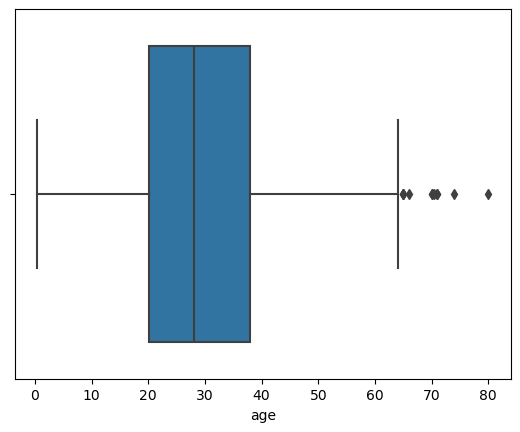

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['age'])
plt.show()

Теперь мы можем заметить, что в основном на корабле пассажиры, возраст которых от 20 до 40 лет, и некоторые участники возраст которых указывает на то что они малыши младше 3лет или пожилые люди, возраст которых превышает 60лет. Я думаю лучше будет заполнить пустые места с помощью функций mode(), так как значение в основном варируются между 20 и 40.

In [4]:
df['age'].fillna(df['age'].mode()[0], inplace = True)

И вот так я заполнил пустые места модой. Далее мы так же можем заметить что столбцы embarked, deck, embark_town не полные, и теперь я заполню и их

In [5]:
df['deck'].fillna('unknown')

0      unknown
1            C
2      unknown
3            C
4      unknown
        ...   
886    unknown
887          B
888    unknown
889          C
890    unknown
Name: deck, Length: 891, dtype: object

Я заполнил пустые в столбце deck словом unknown 

In [6]:
missing_both = df[df['embarked'].isnull() & df['embark_town'].isnull()]
print(missing_both)

     Unnamed: 0  survived  pclass     sex   age  sibsp  parch  fare embarked  \
61           61         1       1  female  38.0      0      0  80.0      NaN   
829         829         1       1  female  62.0      0      0  80.0      NaN   

     class    who  adult_male deck embark_town alive  alone  
61   First  woman       False    B         NaN   yes   True  
829  First  woman       False    B         NaN   yes   True  


Данные строки нельзя заполнить, так как неизвестно город отправления(embark_town), и коды(embarked) в одинаковых строках, поэтому нельзя заполнить эти пустые места. По таблице мы можем заметить, что значение в столбце embarked совпадают с первой буквы города embark_town:Southampton - S, Cherbourg - C и т.д. И теперь когда я закончил с предобработкой, можно приступить к исследованию


# 1. Посчитаем средний возраст пассажиров сгруппированных по классам.

In [7]:
df.groupby('class').agg({'age':'mean'}).reset_index().round(0)

,class,age
0,First,36.0
1,Second,30.0
2,Third,25.0


# 2. Выявим какого возраста пассажиры выжили больше всего

In [8]:
survived = df[df['survived'] == 1]

df1 = survived['age'].mode().iloc[0]

print(f'Возраст пассажиров, которые выжили больше всего: {df1}')

Возраст пассажиров, которые выжили больше всего: 24.0


# 3. Выявим какие возраста в основном были рассредоточены по классам, а также среднюю плату за билеты среди них

In [9]:
df2= df.groupby(['class','age'])['fare'].mean()
df2

class  age  
First  0.92     151.5500
       2.00     151.5500
       4.00      81.8583
       11.00    120.0000
       14.00    120.0000
                  ...   
Third  61.00      6.2375
       63.00      9.5875
       65.00      7.7500
       70.50      7.7500
       74.00      7.7750
Name: fare, Length: 182, dtype: float64

Сначало мы группировали пассажиров по их возрасту и классу и нашли среднюю стоимость билет для каждого возраста пассажира.

In [10]:
most_varied_age = df2.groupby('age').std().idxmax()
most_varied_age

15.0

Тут мы сначало находим стандартное отклонение, а далее возраст с наибольшим стандартным отклонением, что равняется 15 лет.

In [11]:
average_fare = df2.loc(axis=0)[:, most_varied_age].mean()
average_fare

110.28595

Далее мы нашли среднюю плату за билет среди людей, у которых возраст равна 15 лет, агрегировав данные по всем классам 

# 4. Выявим в каком порту было больше всего пассажиров до 40 лет

In [12]:
passengers_under40 = df[df['age'] < 40]

port_with_p_u40 = passengers_under40.groupby('embark_town').agg({'age':'count'}).sort_values(by = 'age', ascending = False).head(1).reset_index()
port_with_p_u40

,embark_town,age
0,Southampton,523


# 5. Выявим самый популярный класс для пассажиров женского пола и среднюю цену поездки по ним

In [41]:
women = df[df['who'] == 'woman']
popular_class = women['class'].mode().iloc[0]
print('Самый популярный класс среди женщин:',popular_class)

Самый популярный класс среди женщин: Third


In [43]:
third_class = women[women['class'] == popular_class]
average_fare_for_women = third_class['fare'].mean()
print('Средняя цена поездки для женщин в третьем классе:',average_fare_for_women)

Средняя цена поездки для женщин в третьем классе: 15.354350877192982


# 6. Разделив пассажиров по полам, выявим какие пассажиры имеют большую сумму платы за поездку.

In [20]:
large_amount_of_fare = df.groupby('sex').agg({'fare':'sum'}).sort_values(by = 'fare', ascending = False).reset_index()
large_amount_of_fare

,sex,fare
0,male,14727.2865
1,female,13966.6628


# 7. Теперь посчитаем сколько было заработано денег в целом

In [31]:
total_earnings = large_amount_of_fare['fare'].sum()

In [39]:
print('В целом было заработано',total_earnings,'долларов')

В целом было заработано 28693.9493 долларов


# 8. Предположим, что компания решила выплатить компенсацию, пострадавшим семьям. Посчитаем сколько компания должна выплатить родственникам погибших на титанике, если компания обязана выплатить 100тыс долларов за каждого погибшего человека.

In [34]:
ds = df[df['alive'] == 'no']
deceaseds = ds['alive'].count()
deceaseds

549

In [38]:
compensation = 100000

total_payout = deceaseds * compensation
print('Компания должна выплатить родственникам погибших:',total_payout,'долларов')

Компания должна выплатить родственникам погибших: 54900000 долларов


# Вывод

### Исходя из исследования можно сказать что это поистину трагичная ситуация, всего на корабль взошли 891 пассажиров, и из них больше половина(549) к сожалению погибла. 
### Итак мы имеем следующее данные:

#### 1. В основном возраст пассажиров было между 20 и 40, средний возраст пассажиров 1 класса - 36, 2 класса - 30, третьего класса - 25. Мы можем заметить что возраст пассажиров меняется исходя из класса, то есть пассажиры в более высоком классе имели более высокий средний возраст. Средний возраст  пассажиров, которые выжили - 24.
#### 2. Основная часть пассажиров(523), возраст которых был до 40, взошли на борт с порта Саутгемптон. Это больше чем половина от общего количества пассажиров.
#### 3. В целом компания заработала 28693.9493 долларов за данное путешествие
#### 4. Компания выплатила родственникам 549 погибших пассажиров по 100000 долларов, и в сумме выплатила 54900000 долларов.

### Компания в итоге понесла убыток в размере 54,871,306.1 долларов